In [83]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import category_encoders as ce

from sklearn.decomposition import PCA

In [342]:
df=pd.read_csv("../Data/Weusethis.csv")
df.isna().sum()             #No missing value

df[df["Kejadian"]=="BANJIR"].shape[0]               #225 amatan banjir
df[df["Kejadian"]=="TIDAK BANJIR"].shape[0]         #790 amatan tidak banjir

#Change tolower
df["KELURAHAN"].unique()
df["KELURAHAN"]=df['KELURAHAN'].map(str.lower)


#Change target to binary 
targetname=['TIDAK BANJIR', 'BANJIR']
for i in range(len(targetname)):
    df["Kejadian"][df["Kejadian"]==targetname[i]]=i 
df["Kejadian"]=df["Kejadian"].astype("int64")

df.describe()
df.head(5)

C:\Users\Rhey\AppData\Local\Temp\ipykernel_4368\3713027446.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Kejadian"][df["Kejadian"]==targetname[i]]=i


,Kejadian,KELURAHAN,RAIN_D-1,RAINFALL_D-1,RAIN_LAST3D,ARAINFALL_LAST3D,RAIN_LAST7D,RAINFALL_LAST7D,TEPS_OF_DAY,CIPINANG HULU,SUNTER HULU,PULO GADUNG
0,1,balekambang,NO,0.0,NO,0.0,NO,0.0,TIDAK HUJAN,160,250,450
1,1,balekambang,NO,0.0,NO,0.0,NO,83.0,TIDAK HUJAN,90,140,330
2,1,balekambang,NO,0.0,NO,2.0,NO,2.0,TIDAK HUJAN,75,90,330
3,1,balekambang,YES,66.0,YES,74.0,NO,85.0,HUJAN LEBAT,170,300,580
4,1,balekambang,YES,41.0,YES,87.0,NO,154.0,HUJAN SEDANG,160,175,620


In [343]:
X=df.copy()
y=X.pop("Kejadian")

In [344]:
#Proportion and basic exploration
#Check proportion of kejadian by kelurahan
temp=[]
for i in X["KELURAHAN"].unique():
    temp.append([i, df.iloc[:,:2][df["KELURAHAN"]==i][df["Kejadian"]==0].shape[0],
                 df.iloc[:,:2][df["KELURAHAN"]==i][df["Kejadian"]==1].shape[0]])
pd.DataFrame(temp, columns=["kelurahan", "n tidak banjir", "n banjir"])

C:\Users\Rhey\AppData\Local\Temp\ipykernel_4368\3888616326.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  temp.append([i, df.iloc[:,:2][df["KELURAHAN"]==i][df["Kejadian"]==0].shape[0],
C:\Users\Rhey\AppData\Local\Temp\ipykernel_4368\3888616326.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df.iloc[:,:2][df["KELURAHAN"]==i][df["Kejadian"]==1].shape[0]])


,kelurahan,n tidak banjir,n banjir
0,balekambang,30,10
1,bambu apus,10,1
2,batu ampar,20,5
3,bidara cina,30,14
4,cakung timur,10,2
5,cawang,30,15
6,cililitan,30,15
7,cipayung,20,4
8,cipinang,10,1
9,cipinang cempedak,20,3


In [345]:
#Check proportion of teps of day by kelurahan
temp=[]
temp1=df["TEPS_OF_DAY"].unique()
for i in X["KELURAHAN"].unique():
    temp.append([i, df.iloc[:,:2][df["KELURAHAN"]==i][df["TEPS_OF_DAY"]==temp1[0]].shape[0],
                df.iloc[:,:2][df["KELURAHAN"]==i][df["TEPS_OF_DAY"]==temp1[1]].shape[0],
                df.iloc[:,:2][df["KELURAHAN"]==i][df["TEPS_OF_DAY"]==temp1[2]].shape[0],
                df.iloc[:,:2][df["KELURAHAN"]==i][df["TEPS_OF_DAY"]==temp1[3]].shape[0]])
    
pd.DataFrame(temp, columns=np.insert(temp1,0,'kelurahan'))

C:\Users\Rhey\AppData\Local\Temp\ipykernel_4368\3478717647.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  temp.append([i, df.iloc[:,:2][df["KELURAHAN"]==i][df["TEPS_OF_DAY"]==temp1[0]].shape[0],
C:\Users\Rhey\AppData\Local\Temp\ipykernel_4368\3478717647.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df.iloc[:,:2][df["KELURAHAN"]==i][df["TEPS_OF_DAY"]==temp1[1]].shape[0],
C:\Users\Rhey\AppData\Local\Temp\ipykernel_4368\3478717647.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df.iloc[:,:2][df["KELURAHAN"]==i][df["TEPS_OF_DAY"]==temp1[2]].shape[0],
C:\Users\Rhey\AppData\Local\Temp\ipykernel_4368\3478717647.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df.iloc[:,:2][df["KELURAHAN"]==i][df["TEPS_OF_DAY"]==temp1[3]].shape[0]])


,kelurahan,TIDAK HUJAN,HUJAN LEBAT,HUJAN SEDANG,HUJAN RINGAN
0,balekambang,33,1,1,5
1,bambu apus,7,0,0,4
2,batu ampar,18,1,1,5
3,bidara cina,33,0,4,7
4,cakung timur,7,0,1,4
5,cawang,34,1,2,8
6,cililitan,34,2,3,6
7,cipayung,19,1,0,4
8,cipinang,7,0,0,4
9,cipinang cempedak,18,0,1,4


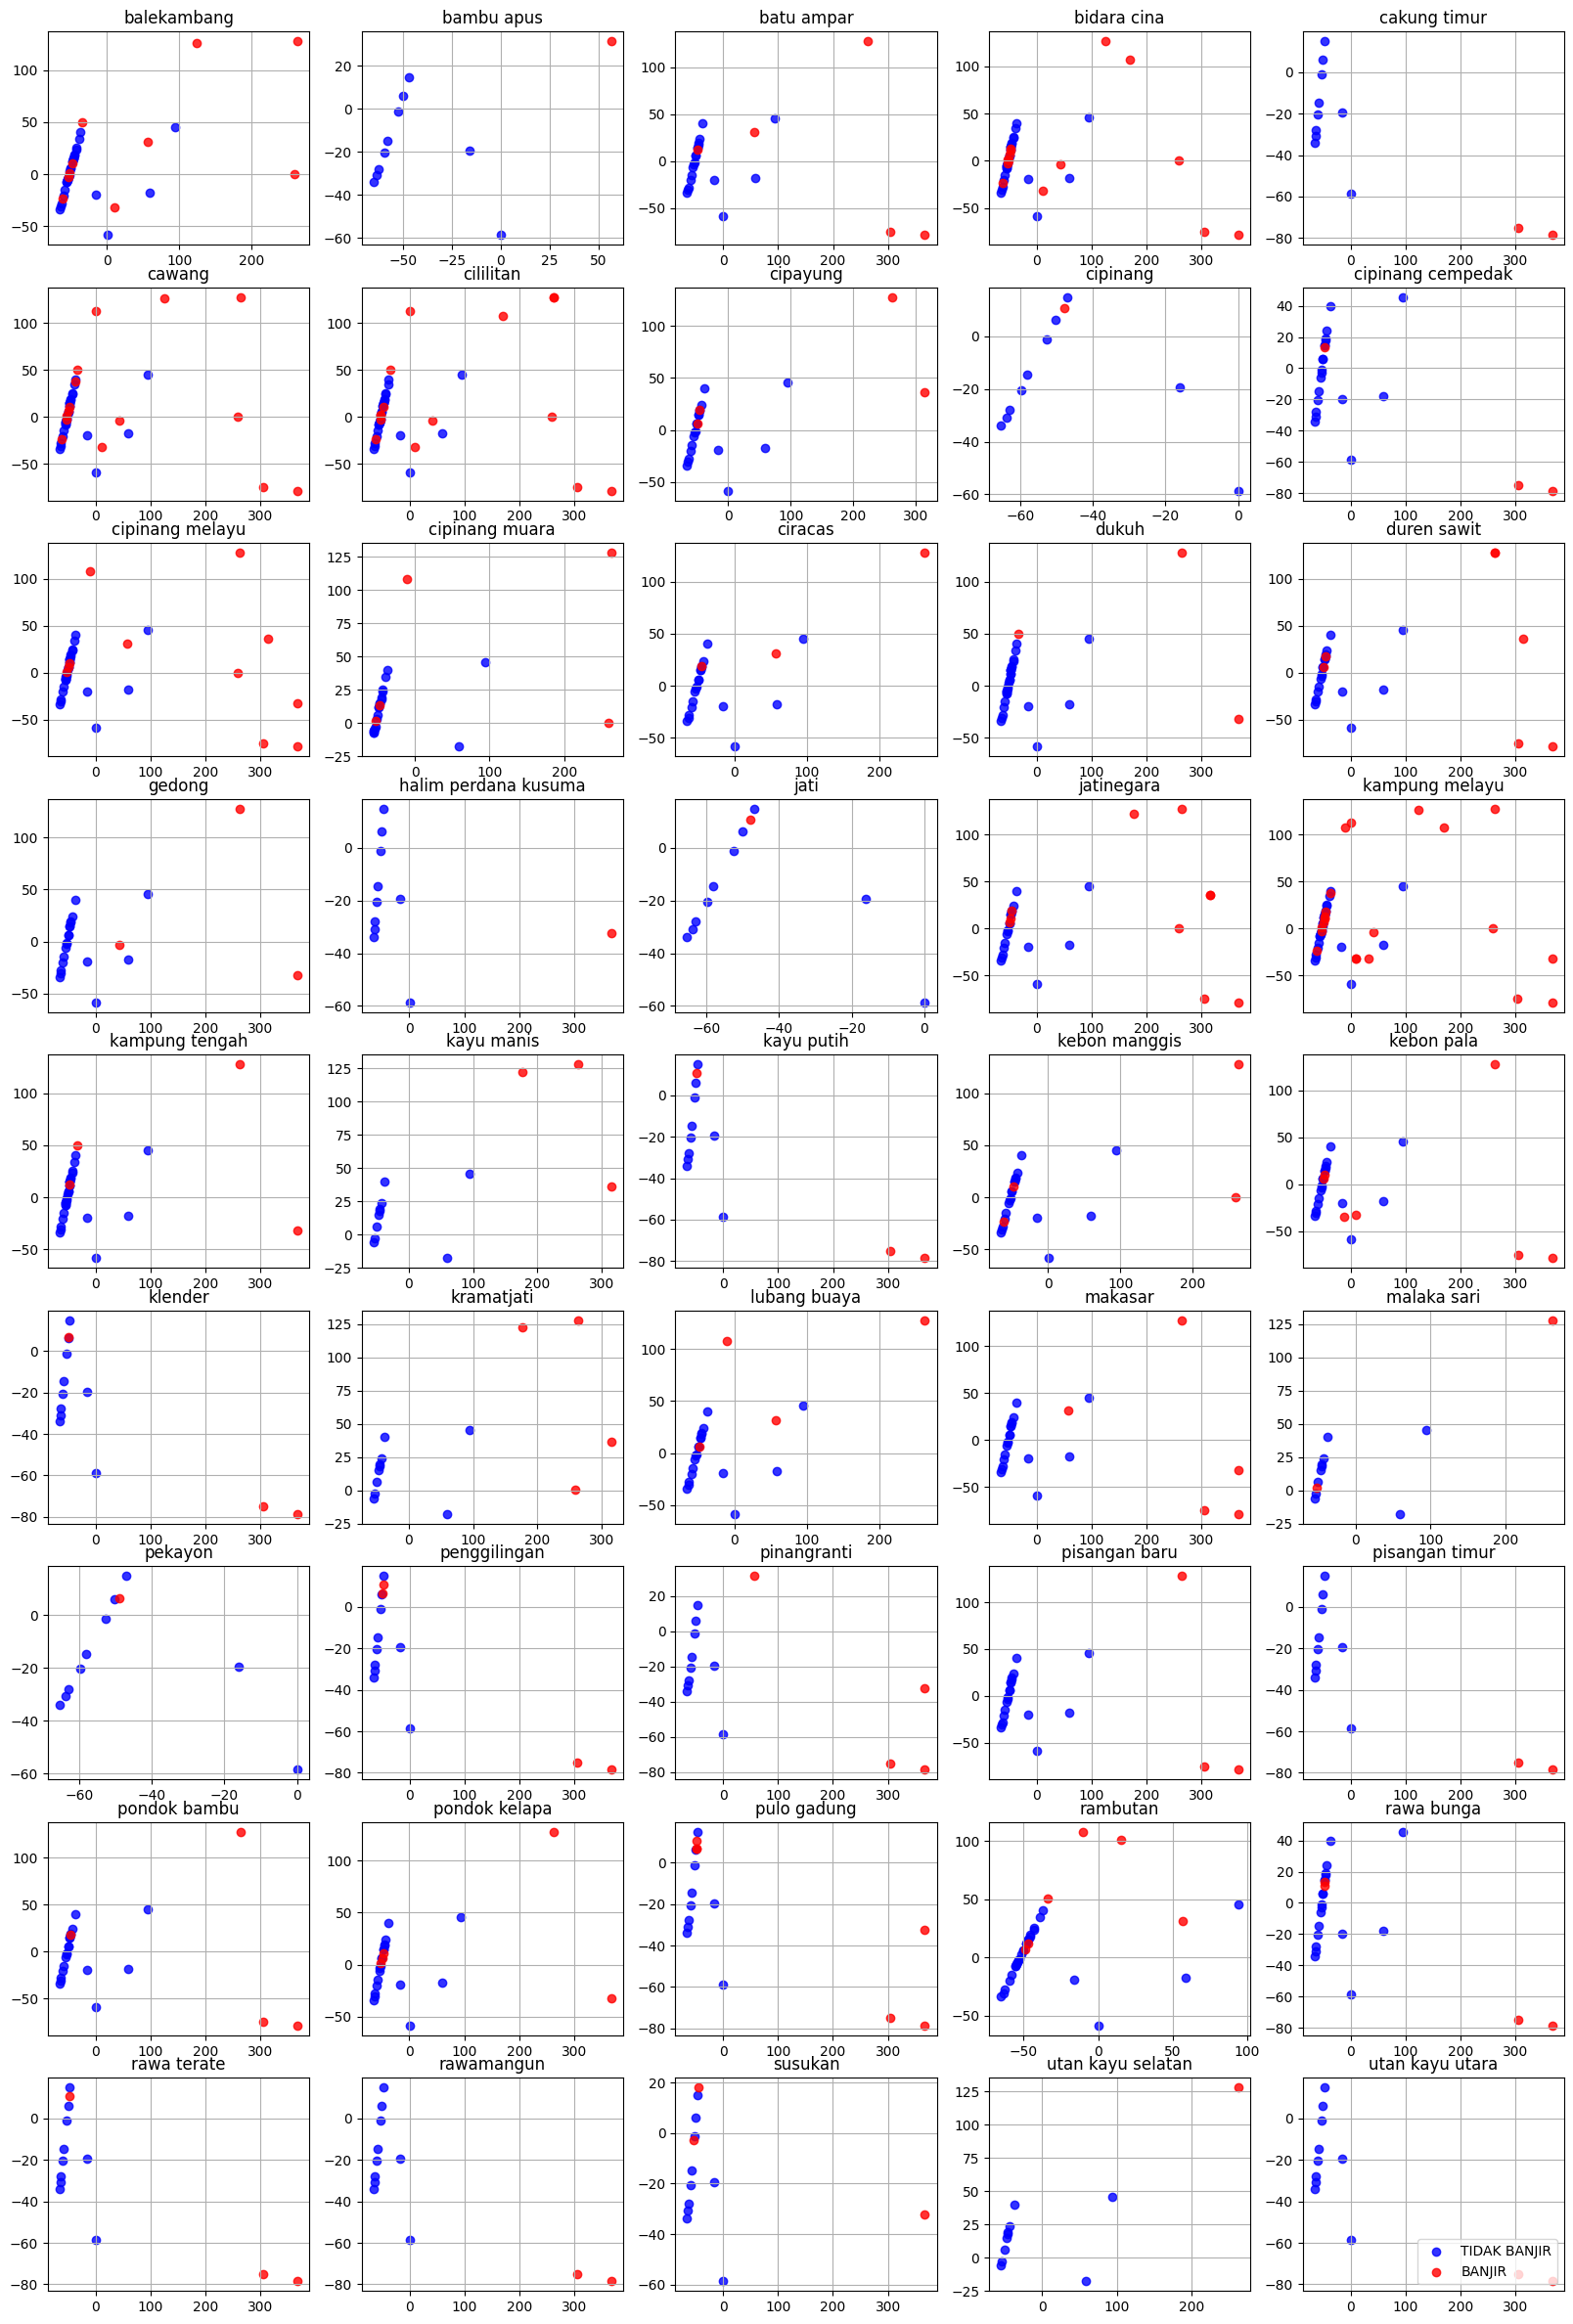

In [346]:
#Visualize with PCA by ["CIPINANG HULU", "SUNTER HULU", "PULO GADUNG"] based on its location
temp=PCA(2).fit_transform(df.iloc[:,-3:].values)
temp=np.append(temp, np.append(y.values.reshape(-1,1), df["KELURAHAN"].values.reshape(-1,1), axis=1),  axis=1)
colours=["blue", "red"]

count=0
fig=plt.figure(figsize=(20,30))
for j in np.unique(temp[:,3]):
    count+=1
    ax = fig.add_subplot(9, 5, count)
    temp1=temp[temp[:,3]==j]
    for i in range(len(targetname)):
        ax.scatter(temp1[temp1[:,2]==i, 0], temp1[temp1[:,2]==i, 1], c=colours[i], alpha=0.8, label=targetname[i])
        ax.set_title(str(j))
        ax.grid("on")
plt.legend(loc="lower right")

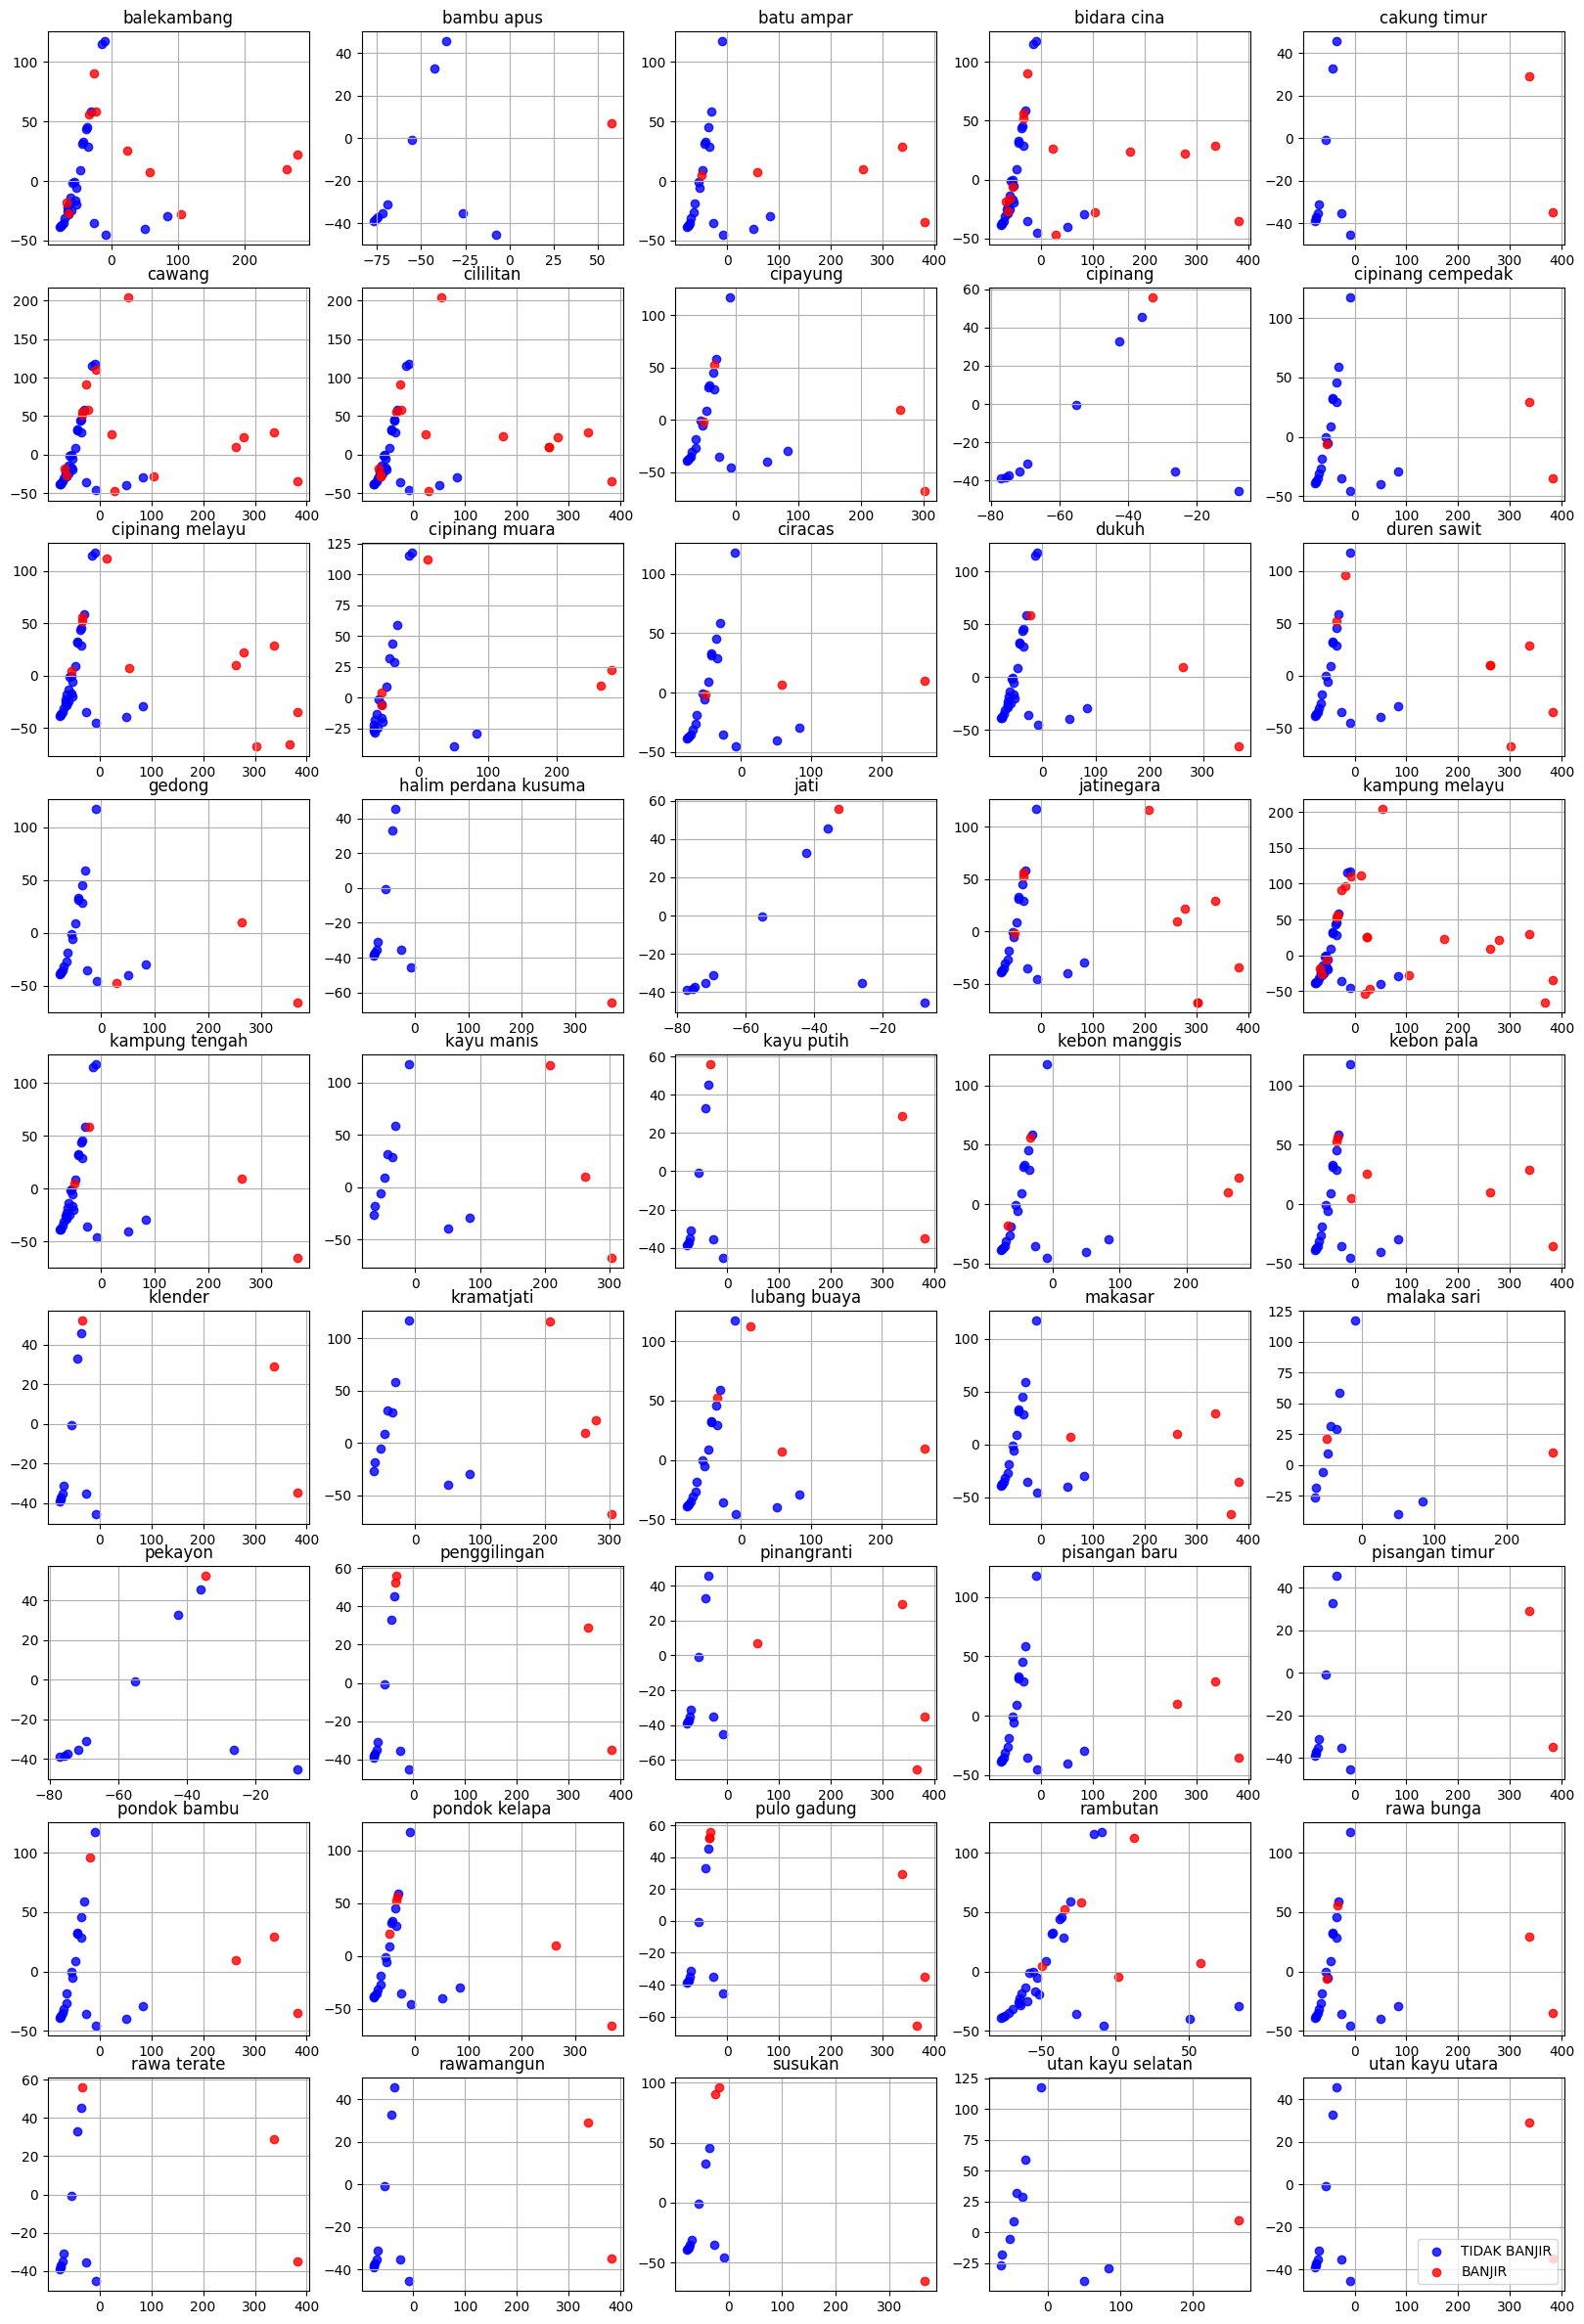

In [347]:
#Visualize with PCA by ["CIPINANG HULU", "SUNTER HULU", "PULO GADUNG", RAINFALL_LAST7D"] based on its location
temp=PCA(2).fit_transform(df[["CIPINANG HULU", "SUNTER HULU", "PULO GADUNG", "RAINFALL_LAST7D"]].values)
temp=np.append(temp, np.append(y.values.reshape(-1,1), df["KELURAHAN"].values.reshape(-1,1), axis=1),  axis=1)
colours=["blue", "red"]

count=0
fig=plt.figure(figsize=(20,30))
for j in np.unique(temp[:,3]):
    count+=1
    ax = fig.add_subplot(9, 5, count)
    temp1=temp[temp[:,3]==j]
    for i in range(len(targetname)):
        ax.scatter(temp1[temp1[:,2]==i, 0], temp1[temp1[:,2]==i, 1], c=colours[i], alpha=0.8, label=targetname[i])
        ax.set_title(str(j))
        ax.grid("on")
plt.legend(loc="lower right")

In [348]:
#Get column based on its type               (Will also be used for conversion later)
objectcolnames=[]; numeric=[]
for i in X.columns:
    objectcolnames.append(i) if df[i].dtype=="object" else numeric.append(i)

In [353]:
#corr matrix
tempencoder=ce.OrdinalEncoder(cols=objectcolnames)
tempdf=df

tempdf=tempencoder.fit_transform(tempdf)
corr = tempdf.corr()
corr.style.background_gradient(cmap='coolwarm')

,Kejadian,KELURAHAN,RAIN_D-1,RAINFALL_D-1,RAIN_LAST3D,ARAINFALL_LAST3D,RAIN_LAST7D,RAINFALL_LAST7D,TEPS_OF_DAY,CIPINANG HULU,SUNTER HULU,PULO GADUNG
Kejadian,1.000000,-0.047324,0.569061,0.592730,0.699028,0.572464,0.332587,0.546902,0.426100,0.560497,0.571451,0.616571
KELURAHAN,-0.047324,1.000000,0.062342,-0.000078,-0.010303,-0.003276,0.022640,0.014373,0.073092,-0.010095,-0.052370,0.037051
RAIN_D-1,0.569061,0.062342,1.000000,0.602468,0.537779,0.379031,0.277957,0.364720,0.939226,0.487797,0.345410,0.507784
RAINFALL_D-1,0.592730,-0.000078,0.602468,1.000000,0.655379,0.511121,0.195226,0.331862,0.311627,0.711261,0.790823,0.662619
RAIN_LAST3D,0.699028,-0.010303,0.537779,0.655379,1.000000,0.647901,0.475786,0.481626,0.371168,0.587775,0.595437,0.592427
ARAINFALL_LAST3D,0.572464,-0.003276,0.379031,0.511121,0.647901,1.000000,0.029800,0.822108,0.241409,0.590078,0.587842,0.669614
RAIN_LAST7D,0.332587,0.022640,0.277957,0.195226,0.475786,0.029800,1.000000,0.166829,0.277184,0.074999,0.111598,0.158652
RAINFALL_LAST7D,0.546902,0.014373,0.364720,0.331862,0.481626,0.822108,0.166829,1.000000,0.294261,0.441480,0.460258,0.526769
TEPS_OF_DAY,0.426100,0.073092,0.939226,0.311627,0.371168,0.241409,0.277184,0.294261,1.000000,0.289380,0.086500,0.320391
CIPINANG HULU,0.560497,-0.010095,0.487797,0.711261,0.587775,0.590078,0.074999,0.441480,0.289380,1.000000,0.849086,0.660779
